# **Lifestyle Recommendations (Diet Plan)**

Dataset Description :
*  **Food Name**: The name of the food item.
*  **Measure:** The serving size or measurement unit for each food item
*  **Grams:** The weight of the food in grams.
*  **Calories:** The total caloric value per serving.
*  **Protein:** The amount of protein in grams per serving.
*  **Fat:** The total fat content in grams per serving.
*  **Sat. Fat:** The saturated fat content in grams per serving.
*  **Fiber:** The dietary fiber content in grams per serving.
*  **Carbs:** The carbohydrate content in grams per serving.
*  **Category:** The food group or category (e.g., Dairy products, Vegetables).

Structure:
*   **Rows:** Each row corresponds to a food item.
*   **Columns:** Each column represents a specific attribute, such as nutritional content or category

# **Data Cleaning and preprocessing**

In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/nutrients_csvfile.csv')
data.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [22]:
# Convert numerical columns to numeric types
data['Calories'] = pd.to_numeric(data['Calories'], errors='coerce')
data['Protein'] = pd.to_numeric(data['Protein'], errors='coerce')
data['Fat'] = pd.to_numeric(data['Fat'], errors='coerce')
data['Sat.Fat'] = pd.to_numeric(data['Sat.Fat'], errors='coerce')
data['Fiber'] = pd.to_numeric(data['Fiber'], errors='coerce')
data['Carbs'] = pd.to_numeric(data['Carbs'], errors='coerce')

In [23]:
data.dtypes

,0
Food,object
Measure,object
Grams,int64
Calories,float64
Protein,float64
Fat,float64
Sat.Fat,float64
Fiber,float64
Carbs,float64
Category,object


In [5]:
data.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [8]:
data.isnull().sum()

,0
Food,0
Measure,0
Grams,0
Calories,1
Protein,0
Fat,0
Sat.Fat,2
Fiber,0
Carbs,0
Category,0


In [18]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
numeric_columns = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [24]:
data.isnull().sum()

,0
Food,0
Measure,0
Grams,0
Calories,0
Protein,0
Fat,0
Sat.Fat,0
Fiber,0
Carbs,0
Category,0


In [57]:
data.duplicated().sum()

0

In [20]:
data.describe()

,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,179.806061,9.702703,13.063927,6.742138,2.576656,25.990994
std,154.475233,17.457719,18.793800,18.409258,16.039335,35.478707
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,2.000000,5.000000,0.000000,0.000000,6.000000
50%,135.000000,5.000000,13.063927,0.000000,0.500000,18.000000
75%,245.000000,12.000000,13.063927,7.500000,1.650000,30.500000
max,992.000000,232.000000,233.000000,234.000000,235.000000,236.000000


In [38]:
 def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def handle_outliers(data, column, method='cap'):
    _, lower_bound, upper_bound = detect_outliers_iqr(data, column)
    if method == 'remove':
        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

data = pd.read_csv('/content/nutrients_csvfile.csv')

numeric_columns = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert and handle non-numeric values

# Drop rows with invalid data in numeric columns (optional)
data = data.dropna(subset=numeric_columns)

for column in numeric_columns:
    data = handle_outliers(data, column, method='cap')  # Change 'cap' to 'remove' to drop outliers

median_protein = data['Protein'].median()

# Replace negative values in the 'protein' column with the median
data.loc[data['Protein'] < 0, 'Protein'] = median_protein

data = data.replace('t', 0)

data.to_csv('cleaned_dataset.csv', index=False)


In [39]:
data.describe()

,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,218.831845,10.657738,10.819940,7.668899,0.594107,20.193750
std,125.707253,9.533704,9.999557,8.723207,0.865881,21.393035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,200.000000,8.000000,9.000000,4.000000,0.100000,13.000000
75%,286.250000,17.250000,14.250000,11.250000,1.000000,30.500000
max,543.125000,38.625000,32.625000,28.125000,2.500000,76.250000


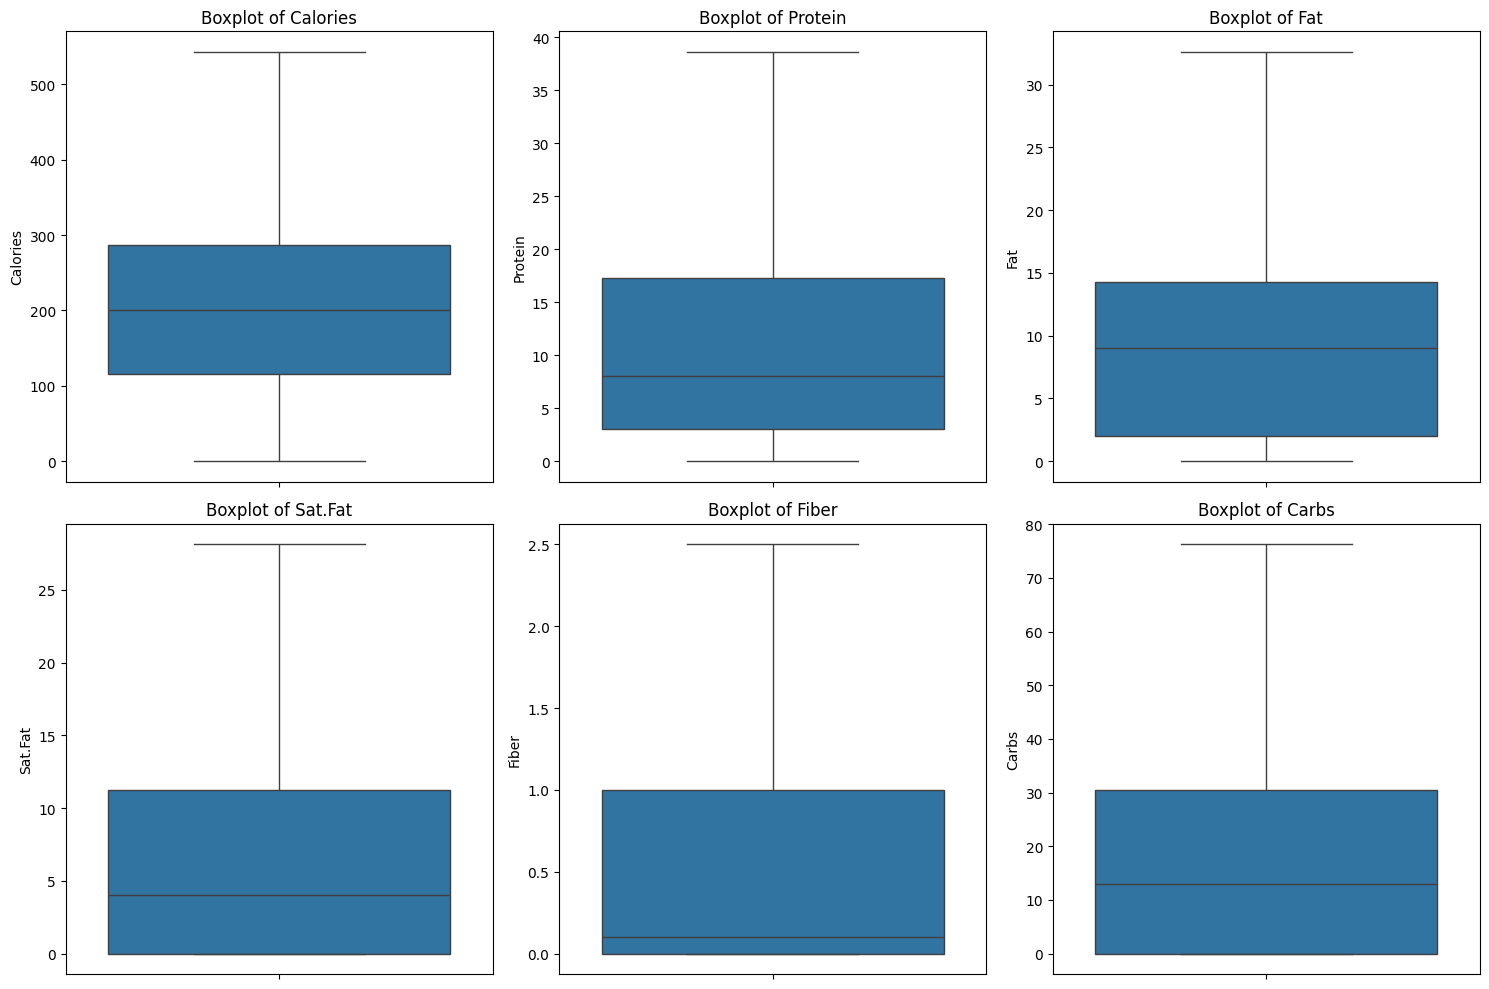

In [35]:
data = pd.read_csv('/content/cleaned_dataset.csv')
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<ipython-input-36-40691c0538cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Category', y='Calories', ci=None, estimator='mean')


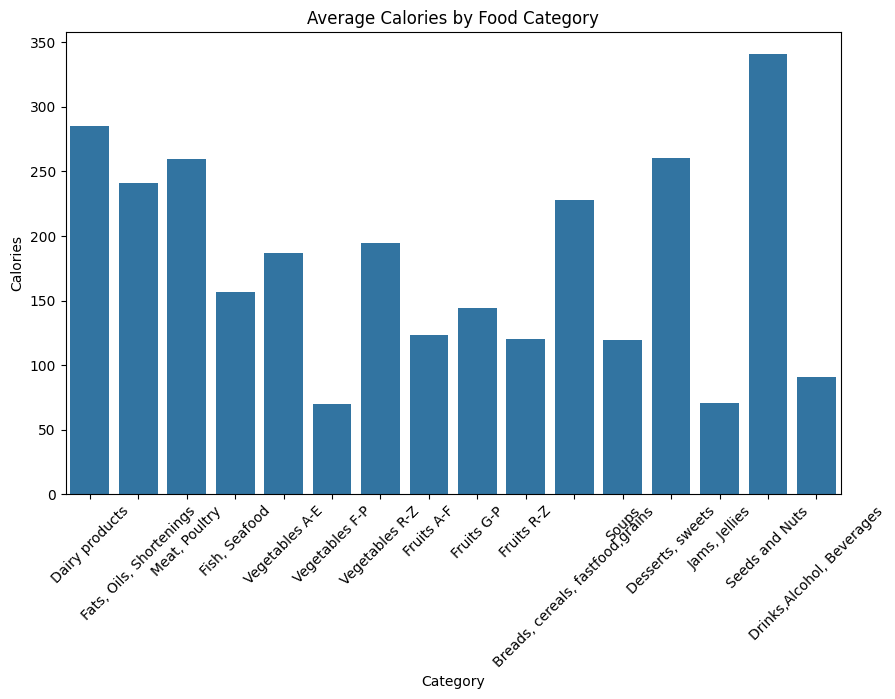

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Category', y='Calories', ci=None, estimator='mean')
plt.title('Average Calories by Food Category')
plt.xticks(rotation=45)
plt.show()

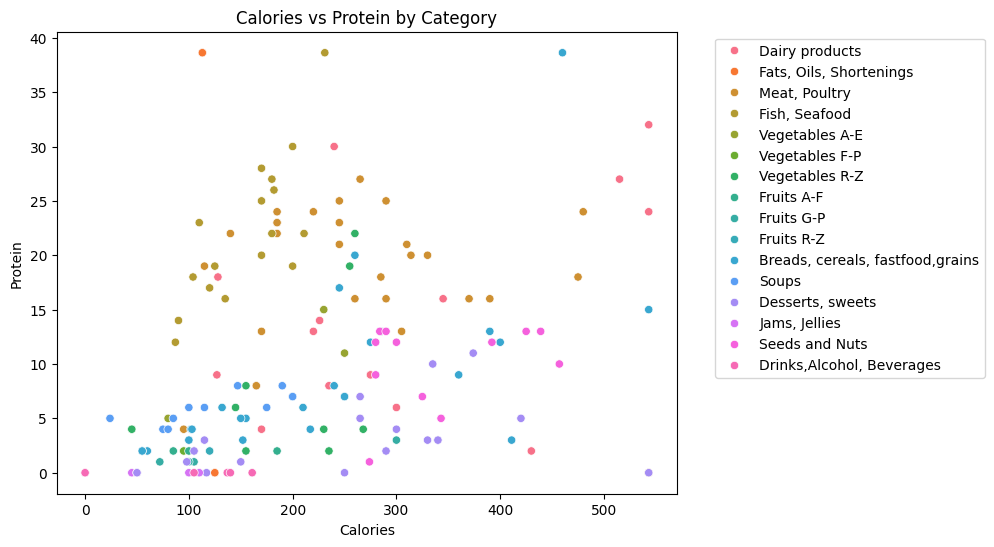

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Calories', y='Protein', hue='Category')
plt.title('Calories vs Protein by Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Collaborative Filtering**

Technique that suggests items to users based on the preferences and behaviors of similar users or items

In [77]:
np.random.seed(42)
num_users = 50
num_items = data.shape[0]

In [78]:
# Creating a random user-item matrix (ratings range from 1 to 5, or 0 for no rating)
user_item_matrix = np.random.randint(0, 6, size=(num_users, num_items))
user_item_matrix[user_item_matrix < 3] = 0  # Setting some interactions to 0 to simulate sparsity


In [87]:
def collaborative_filtering(user_item_matrix, user_id, top_k=5):
    similarity = cosine_similarity(user_item_matrix)
    similar_users = np.argsort(-similarity[user_id])[1:top_k+1]

    recommendations = {}
    for similar_user in similar_users:
        rated_items = np.where(user_item_matrix[similar_user] > 0)[0]
        for item in rated_items:
            if user_item_matrix[user_id][item] == 0:  # Unrated items by the target user
                recommendations[item] = recommendations.get(item, 0) + user_item_matrix[similar_user][item]

    recommended_items = sorted(recommendations, key=recommendations.get, reverse=True)[:top_k]
    return data.iloc[recommended_items]

In [88]:
user_id = 1
food_name = data['Food'].iloc[0]


print("Collaborative Filtering Recommendations:")
print(collaborative_filtering(user_item_matrix, user_id))

Collaborative Filtering Recommendations:
                       Food  Measure  Grams  Calories  Protein   Fat  Sat.Fat  \
16             Cream cheese    1 oz.     28     105.0      2.0  11.0     10.0   
26                     Beef    3 oz.     85     245.0     23.0  16.0     15.0   
41        Shoulder, braised    3 oz.     85     285.0     18.0  23.0     21.0   
46               Pork roast    3 oz.     85     310.0     21.0  24.0     21.0   
156  Peanut butter, natural  1/3 cup     50     284.0     13.0  24.0     10.0   

     Fiber  Carbs        Category  
16     0.0    1.0  Dairy products  
26     0.0    0.0   Meat, Poultry  
41     0.0    0.0   Meat, Poultry  
46     0.0    0.0   Meat, Poultry  
156    0.9    8.0  Seeds and Nuts  


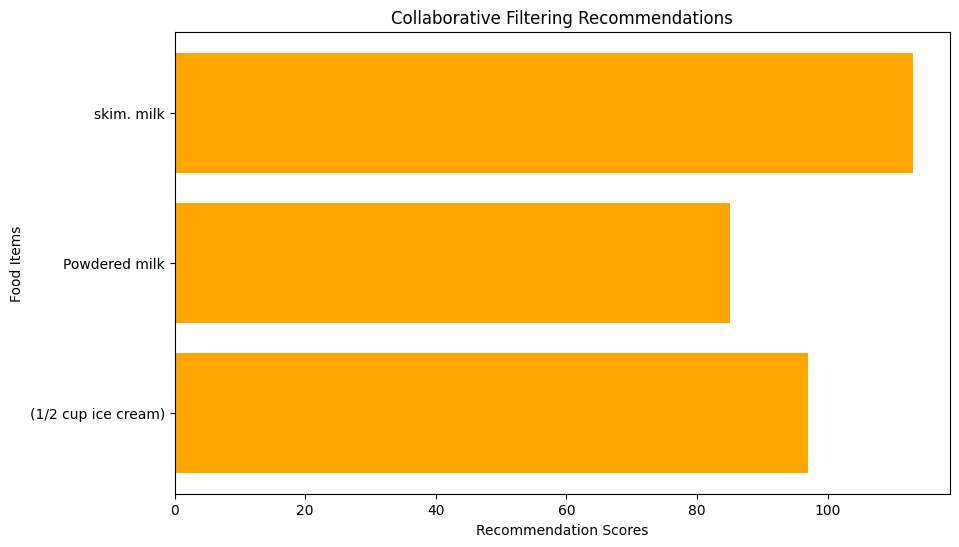

In [119]:
cf_recommendations = collaborative_filtering(user_item_matrix, user_id, top_k=5)

if isinstance(cf_recommendations, pd.DataFrame):
    cf_items = cf_recommendations['Food']
    cf_scores = [np.sum(user_item_matrix[:, item]) for item in cf_recommendations.index]
else:  # Assume cf_recommendations is a list of indices
    cf_items = data['Food'].iloc[cf_recommendations]
    cf_scores = [np.sum(user_item_matrix[:, item]) for item in cf_recommendations]

plt.figure(figsize=(10, 6))
plt.barh(cf_items, cf_scores, color='orange')
plt.xlabel('Recommendation Scores')
plt.ylabel('Food Items')
plt.title('Collaborative Filtering Recommendations')
plt.gca().invert_yaxis()
plt.show()


# **Content-Based Filtering**

This recommendation technique suggests items to users based on the features of the items and the user's past interactions or preferences.

In [89]:
def content_based_filtering(food_name, top_k=5):
    food_index = data[data['Food'] == food_name].index[0]
    similarity = cosine_similarity(data[['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']])
    similar_items = np.argsort(-similarity[food_index])[1:top_k+1]
    return data.iloc[similar_items]

In [91]:
print("Content-Based Filtering Recommendations:")
print(content_based_filtering(food_name))

Content-Based Filtering Recommendations:
                              Food  Measure  Grams  Calories  Protein   Fat  \
3                    Powdered milk    1 cup    103     515.0     27.0  28.0   
77  Scalloped with cheese potatoes  3/4 cup    100     145.0      6.0   8.0   
2            Evaporated, undiluted    1 cup    252     345.0     16.0  20.0   
9                          Custard    1 cup    248     285.0     13.0  14.0   
4                      Goats' milk    1 cup    244     165.0      8.0  10.0   

    Sat.Fat  Fiber  Carbs        Category  
3      24.0    0.0   39.0  Dairy products  
77      7.0    0.4   14.0  Vegetables R-Z  
2      18.0    0.0   24.0  Dairy products  
9      11.0    0.0   28.0  Dairy products  
4       8.0    0.0   11.0  Dairy products  


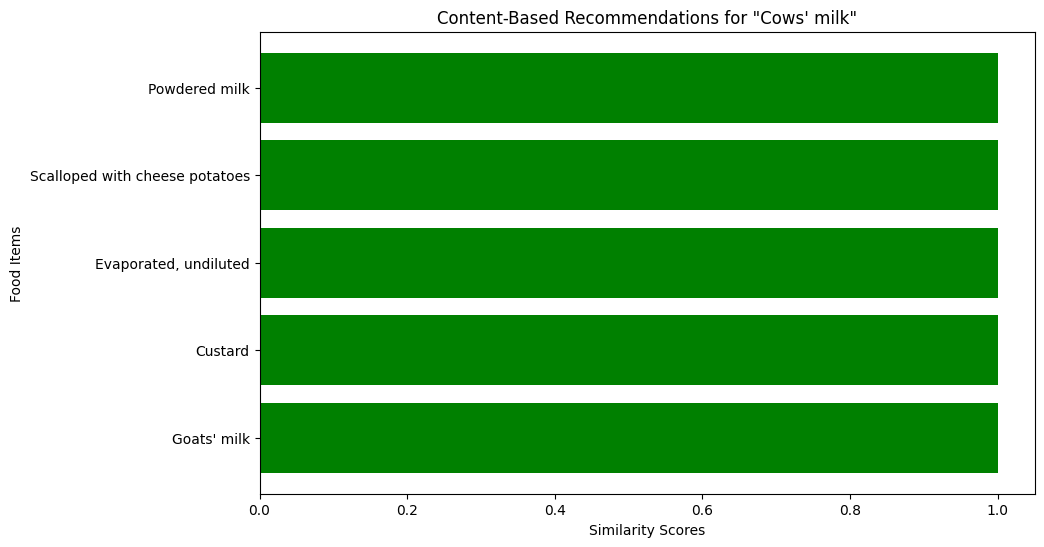

In [121]:
cb_recommendations = content_based_filtering(food_name, top_k=5)

if isinstance(cb_recommendations, pd.DataFrame):
    cb_items = cb_recommendations['Food']
    food_index = data[data['Food'] == food_name].index[0]
    similarity = cosine_similarity(data[['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']])
    cb_scores = similarity[food_index][cb_recommendations.index]
else:
    raise ValueError("content_based_filtering must return a DataFrame.")


plt.figure(figsize=(10, 6))
plt.barh(cb_items, cb_scores, color='green')
plt.xlabel('Similarity Scores')
plt.ylabel('Food Items')
plt.title(f'Content-Based Recommendations for "{food_name}"')
plt.gca().invert_yaxis()
plt.show()


# **Hybrid Approach**

This combines multiple recommendation methods, such as collaborative filtering and content-based filtering, to improve the accuracy and effectiveness of recommendations.

In [92]:
def hybrid_filtering(user_id, food_name, top_k=5):
    cf_recommendations = collaborative_filtering(user_item_matrix, user_id, top_k=top_k).index
    cb_recommendations = content_based_filtering(food_name, top_k=top_k).index

    hybrid_recommendations = list(set(cf_recommendations) | set(cb_recommendations))
    return data.iloc[hybrid_recommendations]

In [93]:
print("Hybrid Recommendations:")
print(hybrid_filtering(user_id, food_name))

Hybrid Recommendations:
                               Food  Measure  Grams  Calories  Protein   Fat  \
2             Evaporated, undiluted    1 cup    252     345.0     16.0  20.0   
3                     Powdered milk    1 cup    103     515.0     27.0  28.0   
4                       Goats' milk    1 cup    244     165.0      8.0  10.0   
41                Shoulder, braised    3 oz.     85     285.0     18.0  23.0   
9                           Custard    1 cup    248     285.0     13.0  14.0   
77   Scalloped with cheese potatoes  3/4 cup    100     145.0      6.0   8.0   
46                       Pork roast    3 oz.     85     310.0     21.0  24.0   
16                     Cream cheese    1 oz.     28     105.0      2.0  11.0   
26                             Beef    3 oz.     85     245.0     23.0  16.0   
156          Peanut butter, natural  1/3 cup     50     284.0     13.0  24.0   

     Sat.Fat  Fiber  Carbs        Category  
2       18.0    0.0   24.0  Dairy products  
3    

# **Knowledge-Based Recommendations**

This approach generates recommendations based on explicit user preferences, requirements, and constraints, often used when user behavior data is limited.

In [94]:
def knowledge_based_recommendation(calorie_limit):
    recommended_items = []
    total_calories = 0

    for _, row in data.sort_values(by='Calories').iterrows():
        if total_calories + row['Calories'] <= calorie_limit:
            recommended_items.append(row)
            total_calories += row['Calories']
        else:
            break

    return pd.DataFrame(recommended_items)


In [98]:
user_id = 1
food_name = data['Food'].iloc[0]
calorie_limit = 350

print("Knowledge-Based Recommendations:")
print(knowledge_based_recommendation(calorie_limit))

Knowledge-Based Recommendations:
                                         Food Measure  Grams  Calories  \
163                                 Club soda  12 oz.    346       0.0   
162  Carbonated drinks Artificially sweetened  12 oz.    346       0.0   
119                                  Bouillon   1 cup    240      24.0   
71                                       Kale   1 cup    110      45.0   
81                              Turnip greens   1 cup    145      45.0   
137                                  Molasses    1 T.     20      45.0   
136                                   Jellies    1 T.     20      50.0   
138                                Cane Syrup    1 T.     20      50.0   
146                         3 teaspoons sugar    1 T.     12      50.0   

     Protein  Fat  Sat.Fat  Fiber  Carbs                   Category  
163      0.0  0.0      0.0    0.0    0.0  Drinks,Alcohol, Beverages  
162      0.0  0.0      0.0    0.0    0.0  Drinks,Alcohol, Beverages  
119      5.0  0.

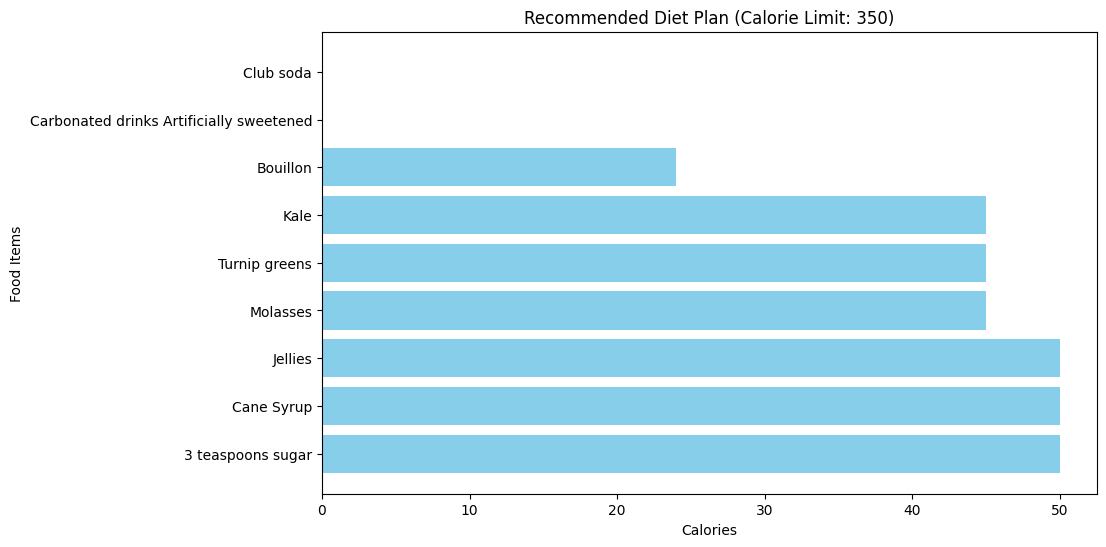

In [124]:
recommendation_plan = knowledge_based_recommendation(calorie_limit)
plt.figure(figsize=(10, 6))
plt.barh(recommendation_plan['Food'], recommendation_plan['Calories'], color='skyblue')
plt.xlabel('Calories')
plt.ylabel('Food Items')
plt.title(f'Recommended Diet Plan (Calorie Limit: {calorie_limit})')
plt.gca().invert_yaxis()
plt.show()